# Rifqi Novandi
Tugas Akhir Deployment

Import Dictionary from Kaggle

Simpson Classification Dataset
https://www.kaggle.com/mathurinache/simpsons-images

Dataset memiliki lebih dari 10000 data dan memiliki resolusi yang berbeda-beda

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = 'rifqinovandi'
os.environ['KAGGLE_KEY'] = 'd50fccc96f3e2238ad06dac3037b103c'

In [ ]:
!kaggle datasets download -d mathurinache/simpsons-images

simpsons-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

files = "/content/simpsons-images.zip"
zip = zipfile.ZipFile(files, 'r')
zip.extractall('/content')
zip.close()

Clean Dataset

In [ ]:
base_dir = "/content/train"

In [ ]:
import shutil

used = ['bart_simpson', 'charles_montgomery_burns',
        'homer_simpson','lisa_simpson', 'marge_simpson',
        'krusty_the_clown','moe_szyslak', 'ned_flanders',
        'principal_skinner']

list_dir = os.listdir(base_dir)
dest = '/content/used_train_dir'

for dir in list_dir:
    if dir in used:
        dir_to_move = os.path.join(base_dir, dir)
        shutil.move(dir_to_move, dest)

In [ ]:
k = ['krusty_the_clown']

for dir in list_dir:
    if dir in k:
        dir_to_move = os.path.join(base_dir, dir)
        shutil.move(dir_to_move, dest)

In [ ]:
used_dir = '/content/used_train_dir'

bart_dir = os.path.join(used_dir, "bart_simpson")
charles_dir = os.path.join(used_dir, "charles_montgomery_burns")
homer_dir = os.path.join(used_dir, "homer_simpson")
krusty_dir = os.path.join(used_dir, "krusty_the_clown")
milhouse_dir = os.path.join(used_dir, "milhouse_van_houten")
marge_dir = os.path.join(used_dir, "marge_simpson")
moe_dir = os.path.join(used_dir, "moe_szyslak")
ned_dir = os.path.join(used_dir, "ned_flanders")
principal_dir = os.path.join(used_dir, "principal_skinner")

In [ ]:
bart_total = len(os.listdir(bart_dir))
charles_total = len(os.listdir(charles_dir))
homer_total = len(os.listdir(homer_dir))
krusty_total = len(os.listdir(krusty_dir))
milhouse_total = len(os.listdir(milhouse_dir))
marge_total = len(os.listdir(marge_dir))
moe_total = len(os.listdir(moe_dir))
ned_total = len(os.listdir(ned_dir))
principal_total = len(os.listdir(principal_dir))

print('Total Data Bart       : ', bart_total)
print('Total Data Charles    : ', charles_total)
print('Total Data Homer      : ', homer_total)
print('Total Data Krusty     : ', krusty_total)
print('Total Data Milhouse   : ', milhouse_total)
print('Total Data Marge      : ', marge_total)
print('Total Data Moe        : ', moe_total)
print('Total Data Ned        : ', ned_total)
print('Total Data Principal  : ', principal_total)

Total Data Bart       :  1142
Total Data Charles    :  993
Total Data Homer      :  2046
Total Data Krusty     :  1006
Total Data Milhouse   :  879
Total Data Marge      :  1091
Total Data Moe        :  1252
Total Data Ned        :  1254
Total Data Principal  :  994


Dataset yang digunakan berjumlah 10657

In [ ]:
total_data = bart_total+charles_total+homer_total+krusty_total+milhouse_total+marge_total+moe_total+ned_total+principal_total
print('Total Data yang digunakan : ', total_data)

Total Data yang digunakan :  10657


Memisahkan Training dan Validation 20 %

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_size = 0.2

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=0,
    shear_range=0.2,
    zoom_range=0,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=val_size
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=False,
    fill_mode="nearest",
    validation_split=val_size
)

In [ ]:
train_gen = train_datagen.flow_from_directory(
    used_dir,
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

validation_gen = validation_datagen.flow_from_directory(
    used_dir,
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

Found 8530 images belonging to 9 classes.
Found 2127 images belonging to 9 classes.


Menggunakan Model Sequential

Layer Conv2D dan Maxpooling 

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(160, 160, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(9, activation='softmax')
])

Menggunakan Callback on_epoch_end

In [ ]:
from tensorflow.keras.callbacks import Callback

class MyCallback(Callback):
   def on_epoch_end(self, epoch, logs={}):
     if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
       print("\nModel mencapai 92% of Accuracy")
       self.model.stop_training=True

callbacks = MyCallback()

Menggunakan Optimizer Adam

In [ ]:
from tensorflow.keras.optimizers import Adam

Adam(learning_rate=0.0001, name='Adam')

model.compile(loss='categorical_crossentropy',
              metrics='accuracy',
              optimizer='Adam'
)

Train Model

In [ ]:
hist = model.fit(
    train_gen,
    batch_size=32,
    epochs=100,
    steps_per_epoch=8530 // 32,
    validation_data=validation_gen,
    validation_steps=2127 // 32,
    verbose=1,
    callbacks=[callbacks]
)

Epoch 1/100
266/266 [==============================] - 72s 269ms/step - loss: 1.9289 - accuracy: 0.2837 - val_loss: 1.5831 - val_accuracy: 0.4257
Epoch 2/100
266/266 [==============================] - 71s 268ms/step - loss: 1.2131 - accuracy: 0.5783 - val_loss: 0.9726 - val_accuracy: 0.6667
Epoch 3/100
266/266 [==============================] - 71s 267ms/step - loss: 0.7464 - accuracy: 0.7481 - val_loss: 0.7709 - val_accuracy: 0.7562
Epoch 4/100
266/266 [==============================] - 73s 275ms/step - loss: 0.5505 - accuracy: 0.8216 - val_loss: 0.6778 - val_accuracy: 0.7879
Epoch 5/100
266/266 [==============================] - 71s 268ms/step - loss: 0.4097 - accuracy: 0.8700 - val_loss: 0.4691 - val_accuracy: 0.8561
Epoch 6/100
266/266 [==============================] - 73s 274ms/step - loss: 0.3327 - accuracy: 0.8956 - val_loss: 0.4418 - val_accuracy: 0.8674
Epoch 7/100
266/266 [==============================] - 71s 266ms/step - loss: 0.2688 - accuracy: 0.9147 - val_loss: 0.3949 -

Setelah Accuracy Model mencapai 92 % train model stop 

Plot Accuracy dan Loss Model

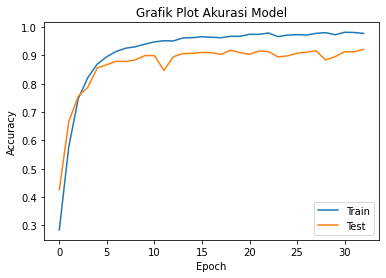

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Grafik Plot Akurasi Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

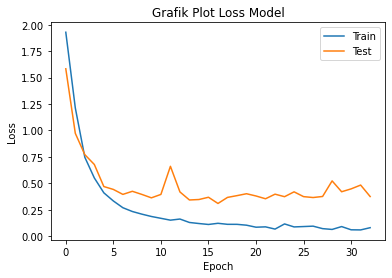

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Grafik Plot Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Coba gunakan untuk Predict

Saving eba21443ca4d71cc9552a26aaf8c165e.jpg to eba21443ca4d71cc9552a26aaf8c165e.jpg


Hasil Prediksi :  [1. 0. 0. 0. 0. 0. 0. 0. 0.] 

Kategori Gambar : Bart Simpson


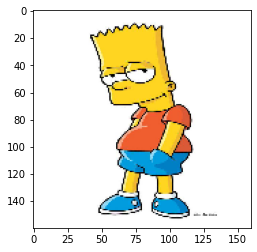

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files
from keras.preprocessing import image
%matplotlib inline

uploaded = files.upload()

for file_upload in uploaded.keys():

  path = file_upload
  img = image.load_img(path, target_size=(160,160))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  print("\n")
  print('Hasil Prediksi : ',classes[0],'\n')

  if classes[0][0] == 1:
    print('Kategori Gambar : Bart Simpson')
  elif classes[0][1] == 1:
    print('Kategori Gambar : Charles Montgomery')
  elif classes[0][2] == 1:
    print('Kategori Gambar : Homer Simpson')
  elif classes[0][3] == 1:
    print('Kategori Gambar : Krusty the Clown')
  elif classes[0][4] == 1:
    print('Kategori Gambar : Marge Simpson')
  elif classes[0][5] == 1:
    print('Kategori Gambar : Milhouse van Houten')
  elif classes[0][6] == 1:
    print('Kategori Gambar : Moe Szyslak')
  elif classes[0][7] == 1:
    print('Kategori Gambar : Ned Flanders')
  else:
    print('Kategori Gambar : Principal Skinner')

Simpan model kedalam model TF-Lite

In [ ]:
import warnings
import tensorflow as tf

warnings.filterwarnings('ignore')

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('Simpson_Classifier.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpa3r2c7uv/assets
